In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy

#import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

In [2]:
filename = 'hdf5/9day.h5'

fp_interp_df_1 = pd.read_hdf(filename, key = "fp_df_1")
fp_interp_df_2 = pd.read_hdf(filename, key = "fp_df_2")
fp_interp_df_3 = pd.read_hdf(filename, key = "fp_df_3")
fp_interp_df_4 = pd.read_hdf(filename, key = "fp_df_4")

tr_interp_df_1 = pd.read_hdf(filename, key = "tr_df_1")
tr_interp_df_2 = pd.read_hdf(filename, key = "tr_df_2")
tr_interp_df_3 = pd.read_hdf(filename, key = "tr_df_3")
tr_interp_df_4 = pd.read_hdf(filename, key = "tr_df_4")
tr_interp_df_5 = pd.read_hdf(filename, key = "tr_df_5")
tr_interp_df_6 = pd.read_hdf(filename, key = "tr_df_6")

tr_interp_df_6.head()

,tr_phi,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,...,fp368,fp369,fp370,fp371,fp372,fp373,fp374,fp375,fp376,fp377
1.526229e+09,262.192352,52831.983914,52757.256269,52865.339585,52891.076131,52796.556608,52624.830156,52465.750203,52711.051025,52872.761428,...,51387.452222,52567.747672,57876.120737,51651.049226,54206.981239,55811.699690,50944.176278,48590.040846,52913.416479,45917.333015
1.526229e+09,262.192352,52831.375822,52756.447762,52865.186811,52890.651789,52795.992480,52624.639348,52465.696333,52709.495511,52872.576157,...,51386.663938,52567.669676,57875.708449,51651.569196,54210.154129,55811.115233,50944.601578,48589.157098,52912.135616,45918.195298
1.526229e+09,262.192352,52831.119014,52757.309871,52865.305096,52890.505745,52795.906899,52624.945653,52465.650854,52709.819249,52872.757071,...,51387.541205,52567.751937,57875.432082,51656.970406,54208.002516,55810.415079,50945.411595,48588.437165,52911.374223,45918.436117
1.526229e+09,262.192351,52830.494316,52756.594467,52864.927329,52890.240888,52795.775076,52623.904916,52464.877585,52710.344243,52872.620780,...,51388.792931,52567.877931,57875.237762,51664.595887,54202.131343,55809.887828,50946.511118,48588.443170,52912.430036,45917.104204
1.526229e+09,262.186752,52827.366780,52752.508296,52861.865446,52886.249439,52791.036261,52608.198875,52469.546370,52710.375356,52870.698692,...,51388.855720,52567.823160,57875.020321,51662.396016,54207.903640,55810.759311,50946.567986,48589.570324,52912.268561,45917.495144


In [3]:
#plt.plot(tr_interp_df_3.index.values, tr_interp_df_3["fp100"])

In [3]:
fp_moment_df_1 = helper.calc_moment_df(fp_interp_df_1)
fp_moment_df_2 = helper.calc_moment_df(fp_interp_df_2)
fp_moment_df_3 = helper.calc_moment_df(fp_interp_df_3)
fp_moment_df_4 = helper.calc_moment_df(fp_interp_df_4)

tr_moment_df_1 = helper.calc_moment_df(tr_interp_df_1)
tr_moment_df_2 = helper.calc_moment_df(tr_interp_df_2)
tr_moment_df_3 = helper.calc_moment_df(tr_interp_df_3)
tr_moment_df_4 = helper.calc_moment_df(tr_interp_df_4)
tr_moment_df_5 = helper.calc_moment_df(tr_interp_df_5)
tr_moment_df_6 = helper.calc_moment_df(tr_interp_df_6)

Calculating station 12 moments.        

KeyboardInterrupt: 

In [27]:
fp_moment_df_1.head()

,"st0,m1","st0,m2","st0,m3","st0,m4","st0,m5","st0,m6","st1,m1","st1,m2","st1,m3","st1,m4",...,"st70,m3","st70,m4","st70,m5","st70,m6","st71,m1","st71,m2","st71,m3","st71,m4","st71,m5","st71,m6"
1.525281e+09,52085.094489,189.787120,-610.732898,2095.750919,-1935.271349,-910.031514,57741.260911,2300.383437,1523.572496,3265.952276,...,735.991812,1148.075330,2387.011272,476.818307,52461.627629,-4227.729013,893.686233,1848.942568,765.156610,-43.570812
1.525281e+09,52084.802894,190.738328,-610.855636,2095.849151,-1935.243749,-907.963721,57769.368511,2194.294658,1512.285080,3282.764464,...,736.228418,1148.236542,2385.821505,475.388622,52460.581936,-4225.848168,893.670561,1848.399074,764.423637,-43.688135
1.525281e+09,52083.861331,190.822938,-610.704405,2096.179981,-1937.211130,-907.954280,57795.963684,2275.047945,1532.667731,3290.276700,...,736.373566,1148.093934,2387.294733,476.152653,52460.363487,-4225.919460,894.087026,1848.239892,764.605842,-43.207250
1.525281e+09,52084.039893,190.416591,-610.702589,2096.215549,-1937.038223,-908.691072,57791.573118,2263.938050,1510.857327,3307.185310,...,736.270553,1147.754412,2387.710013,477.507688,52460.202077,-4226.268883,894.473313,1848.255800,764.930176,-42.637133
1.525281e+09,52085.108246,189.850823,-610.805509,2095.921693,-1935.374741,-909.521362,57797.558973,2127.502222,1468.660563,3337.472254,...,736.497793,1147.318512,2385.771188,476.694344,52460.193107,-4225.572175,894.535627,1848.060918,764.343048,-43.456836


In [ ]:
tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)

In [40]:
print(tr_corr_df_1.index.values, tr_corr_df_1["st1,m1"][tr_corr_df_1.index.values[0]])
def fp_moment_df_1_Corr(moment):
    sumAC = np.zeros(72)
    for t in range(0, 260000,2600):
        Shift = np.linspace(0, 71, 72)
        AC = np.array([])
        for shift in range(72):
            stm = np.array([])
            stm_shifted = np.array([])
            for station in range(72):
                stm = np.append(stm, fp_moment_df_1["st" + str(station)+ ",m" + str(moment)][fp_moment_df_1.index.values[t]])
                stm_shifted = np.append(stm_shifted,fp_moment_df_1["st" + str((station + shift)%72) + ",m" + str(moment)][fp_moment_df_1.index.values[t]])
            AC = np.append(AC, np.correlate(stm, stm_shifted))
        sumAC += AC
    sumAC = sumAC / 100
    plt.plot(Shift, sumAC)
    plt.title("m" + str(moment) + " shift correlation, averaged over 100, fpdata1")
    plt.xlabel("shift")
    plt.show()
def fp_moment_df_2_Corr(moment):
    sumAC = np.zeros(72)
    for t in range(0, 200000,2000):
        Shift = np.linspace(0, 71, 72)
        AC = np.array([])
        for shift in range(72):
            stm = np.array([])
            stm_shifted = np.array([])
            for station in range(72):
                stm = np.append(stm, fp_moment_df_2["st" + str(station)+ ",m" + str(moment)][fp_moment_df_2.index.values[t]])
                stm_shifted = np.append(stm_shifted,fp_moment_df_2["st" + str((station + shift)%72) + ",m" + str(moment)][fp_moment_df_2.index.values[t]])
            AC = np.append(AC, np.correlate(stm, stm_shifted))
        sumAC += AC
    sumAC = sumAC / 100
    plt.plot(Shift, sumAC)
    plt.title("m" + str(moment) + " shift correlation, averaged over 100, fpdata2")
    plt.xlabel("shift")
    plt.show()

def fp_moment_df_3_Corr(moment):
    sumAC = np.zeros(72)
    for t in range(0, 230000,2300):
        Shift = np.linspace(0, 71, 72)
        AC = np.array([])
        for shift in range(72):
            stm = np.array([])
            stm_shifted = np.array([])
            for station in range(72):
                stm = np.append(stm, fp_moment_df_3["st" + str(station)+ ",m" + str(moment)][fp_moment_df_3.index.values[t]])
                stm_shifted = np.append(stm_shifted,fp_moment_df_3["st" + str((station + shift)%72) + ",m" + str(moment)][fp_moment_df_3.index.values[t]])
            AC = np.append(AC, np.correlate(stm, stm_shifted))
        sumAC += AC
    sumAC = sumAC / 100
    plt.plot(Shift, sumAC)
    plt.title("m" + str(moment) + " shift correlation, averaged over 100, fpdata3")
    plt.xlabel("shift")
    plt.show()
def fp_moment_df_4_Corr(moment):
    sumAC = np.zeros(72)
    for t in range(0, 150000,1500):
        Shift = np.linspace(0, 71, 72)
        AC = np.array([])
        for shift in range(72):
            stm = np.array([])
            stm_shifted = np.array([])
            for station in range(72):
                stm = np.append(stm, fp_moment_df_4["st" + str(station)+ ",m" + str(moment)][fp_moment_df_4.index.values[t]])
                stm_shifted = np.append(stm_shifted,fp_moment_df_4["st" + str((station + shift)%72) + ",m" + str(moment)][fp_moment_df_4.index.values[t]])
            AC = np.append(AC, np.correlate(stm, stm_shifted))
        sumAC += AC
    sumAC = sumAC / 100
    plt.plot(Shift, sumAC)
    plt.title("m" + str(moment) + " shift correlation, averaged over 100, fpdata4")
    plt.xlabel("shift")
    plt.show()

(array([1.52527291e+09, 1.52527291e+09, 1.52527292e+09, ...,
       1.52527725e+09, 1.52527726e+09, 1.52527726e+09]), 57746.13731690003)


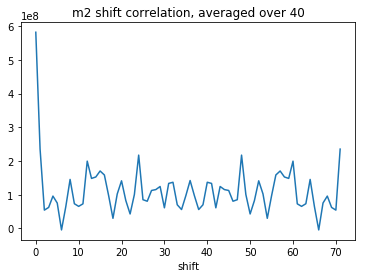

In [29]:
sumAC = np.zeros(72)
#ACp = np.array([])
#Shiftp = np.array([])
for t in range(0, 4000,40):
    Shift = np.linspace(0, 71, 72)
    AC = np.array([])
    for shift in range(72):
        stm = np.array([])
        stm_shifted = np.array([])
        for station in range(72):
            stm = np.append(stm, fp_moment_df_1["st" + str(station)+ ",m" + str(moment)][fp_moment_df_1.index.values[t]])
            stm_shifted = np.append(stm_shifted,fp_moment_df_1["st" + str((station + shift)%72) + ",m" + str(moment)][fp_moment_df_1.index.values[t]])
        AC = np.append(AC, np.correlate(stm, stm_shifted))
    #ACp = np.concatenate((ACp, AC))
    #Shiftp = np.concatenate((Shiftp, Shift))
    #plt.plot(Shift, AC)
    #plt.title("m" + str(moment) + " shift correlation")
    #plt.xlabel("shift")
    #plt.show()
    sumAC += AC
sumAC = sumAC / 100
plt.plot(Shift, sumAC)
plt.title("m" + str(moment) + " shift correlation, averaged over 100")
plt.xlabel("shift")
plt.show()

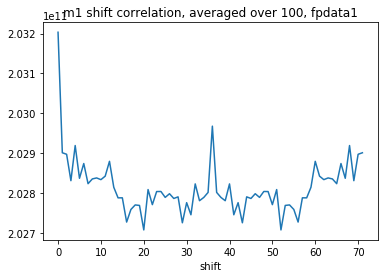

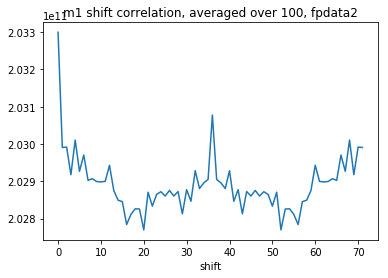

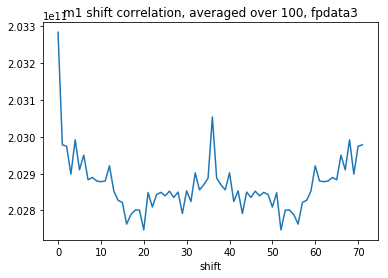

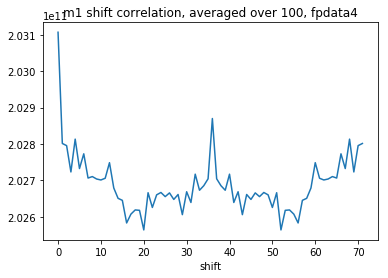

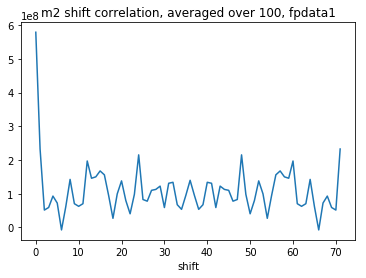

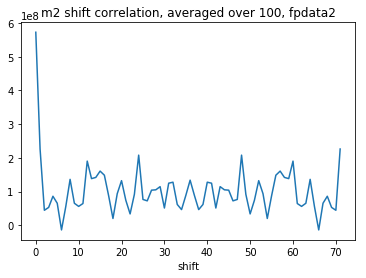

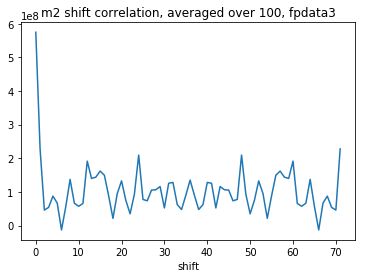

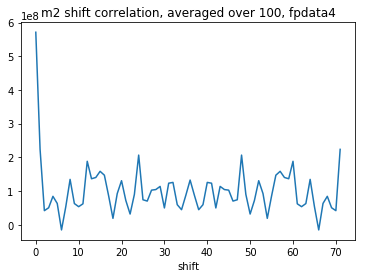

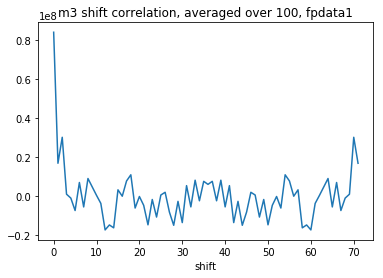

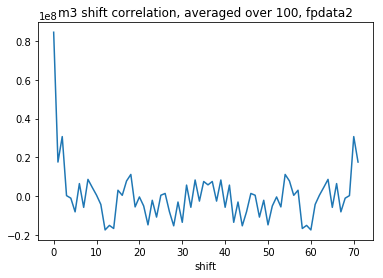

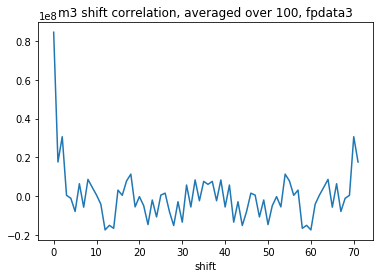

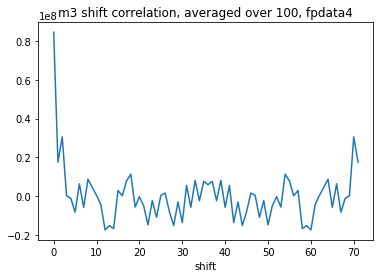

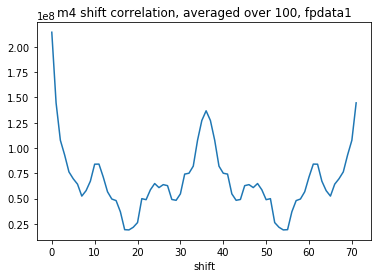

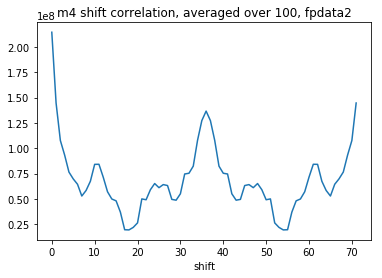

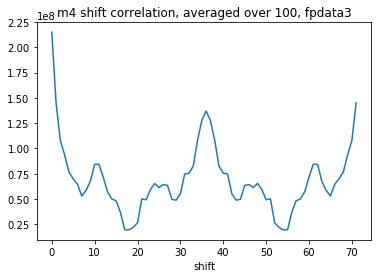

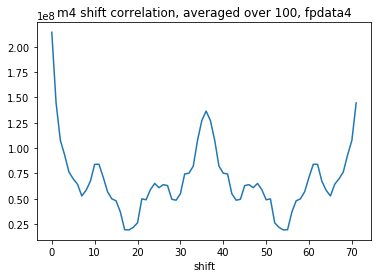

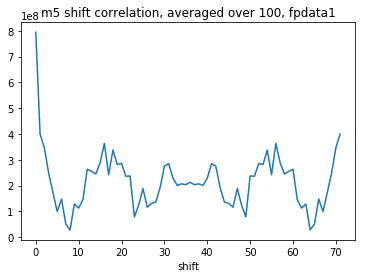

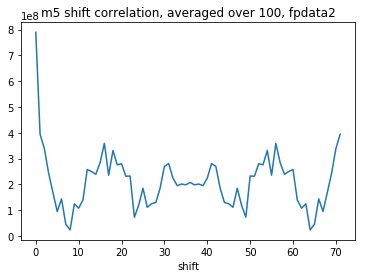

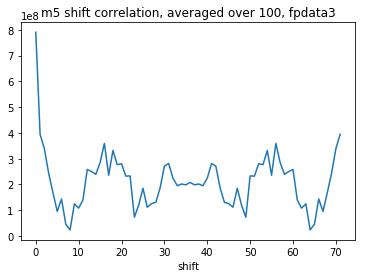

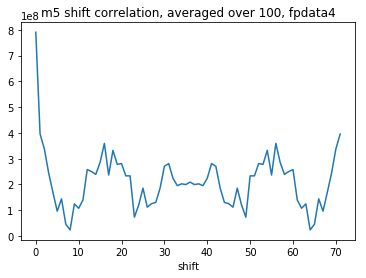

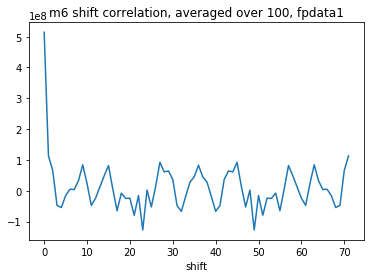

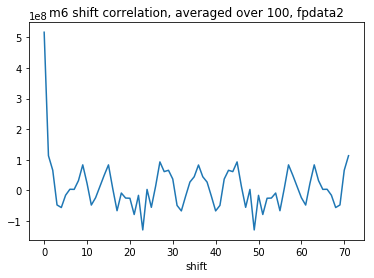

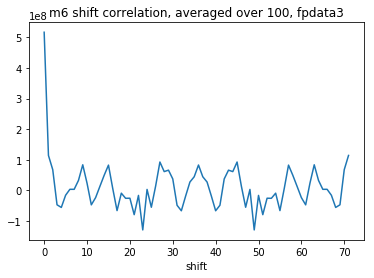

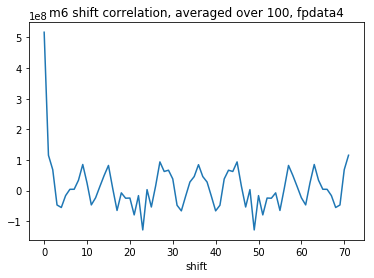

In [42]:
for moment in range(6):
    fp_moment_df_1_Corr(moment + 1)
    fp_moment_df_2_Corr(moment + 1)
    fp_moment_df_3_Corr(moment + 1)
    fp_moment_df_4_Corr(moment + 1)

In [29]:
tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper_old.trolley_run_station_average(tr_corr_df_1)
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper_old.trolley_run_station_average(tr_corr_df_2)
tr_baseline_3, fp_baseline_3, baseline_time_3, summed_azimuth_3, summed_pts_3 = helper_old.trolley_run_station_average(tr_corr_df_3)
tr_baseline_4, fp_baseline_4, baseline_time_4, summed_azimuth_4, summed_pts_4 = helper_old.trolley_run_station_average(tr_corr_df_4)
tr_baseline_5, fp_baseline_5, baseline_time_5, summed_azimuth_5, summed_pts_5 = helper_old.trolley_run_station_average(tr_corr_df_5)
tr_baseline_6, fp_baseline_6, baseline_time_6, summed_azimuth_6, summed_pts_6 = helper_old.trolley_run_station_average(tr_corr_df_6)

In [6]:
vtm_df_1 = helper.vtm_calc(fp_moment_df_1,
                         baseline_time_1, baseline_time_2,
                         tr_baseline_1, tr_baseline_2,
                         fp_baseline_1, fp_baseline_2)

vtm_df_2 = helper.vtm_calc(fp_moment_df_2,
                         baseline_time_3, baseline_time_4,
                         tr_baseline_3, tr_baseline_4,
                         fp_baseline_3, fp_baseline_4)

vtm_df_3 = helper.vtm_calc(fp_moment_df_3,
                         baseline_time_4, baseline_time_5,
                         tr_baseline_4, tr_baseline_5,
                         fp_baseline_4, fp_baseline_5)

vtm_df_4 = helper.vtm_calc(fp_moment_df_4,
                         baseline_time_5, baseline_time_6,
                         tr_baseline_5, tr_baseline_6,
                         fp_baseline_5, fp_baseline_6)

In [7]:
#vtm_df_3.head()

In [8]:
#vtm_df_3.tail()

In [9]:
bins_1 = np.arange(1525281055 ,1525540055+200,100)-50
bin_centers_1 = np.arange(1525281055 ,1525540055+100,100)
bins_2 = np.arange(1525586055 ,1525786055+200,100)-50
bin_centers_2 = np.arange(1525586055 ,1525786055+100,100)
bins_3 = np.arange(1525797055 ,1526030055+200,100)-50     ####Added 1000
bin_centers_3 = np.arange(1525797055 ,1526030055+100,100)
bins_4 = np.arange(1526074055 ,1526227055+200,100)-50
bin_centers_4 = np.arange(1526074055 ,1526227055+100,100)

vtm_bin_df_1 = vtm_df_1.groupby(pd.cut(vtm_df_1.index, bins_1)).mean()
vtm_bin_df_1.index = bin_centers_1
vtm_bin_df_2 = vtm_df_2.groupby(pd.cut(vtm_df_2.index, bins_2)).mean()
vtm_bin_df_2.index = bin_centers_2
vtm_bin_df_3 = vtm_df_3.groupby(pd.cut(vtm_df_3.index, bins_3)).mean()
vtm_bin_df_3.index = bin_centers_3
vtm_bin_df_4 = vtm_df_4.groupby(pd.cut(vtm_df_4.index, bins_4)).mean()
vtm_bin_df_4.index = bin_centers_4

azi_avg_df_1 = pd.DataFrame(np.zeros((vtm_bin_df_1.shape[0],6)),
                         index = vtm_bin_df_1.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])
azi_avg_df_2 = pd.DataFrame(np.zeros((vtm_bin_df_2.shape[0],6)),
                         index = vtm_bin_df_2.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])
azi_avg_df_3 = pd.DataFrame(np.zeros((vtm_bin_df_3.shape[0],6)),
                         index = vtm_bin_df_3.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])
azi_avg_df_4 = pd.DataFrame(np.zeros((vtm_bin_df_4.shape[0],6)),
                         index = vtm_bin_df_4.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])

In [10]:
for m in range(5):
    weight_1 = (summed_azimuth_1[:, m] + summed_azimuth_2[:, m])
    total_weight_1 = np.nansum(weight_1)
    stm_list = ['st'+str(st)+',m'+str(m+1) for st in np.arange(72)]
    azi_avg_df_1['m'+str(m+1)] = vtm_bin_df_1[stm_list].multiply(weight_1).sum(axis=1)/total_weight_1
    
    weight_2 = (summed_azimuth_3[:, m] + summed_azimuth_4[:, m])
    total_weight_2 = np.nansum(weight_2)
    azi_avg_df_2['m'+str(m+1)] = vtm_bin_df_2[stm_list].multiply(weight_2).sum(axis=1)/total_weight_2
    
    weight_3 = (summed_azimuth_4[:, m] + summed_azimuth_5[:, m])
    total_weight_3 = np.nansum(weight_3)
    azi_avg_df_3['m'+str(m+1)] = vtm_bin_df_3[stm_list].multiply(weight_3).sum(axis=1)/total_weight_3
    
    weight_4 = (summed_azimuth_5[:, m] + summed_azimuth_6[:, m])
    total_weight_4 = np.nansum(weight_4)
    azi_avg_df_4['m'+str(m+1)] = vtm_bin_df_4[stm_list].multiply(weight_4).sum(axis=1)/total_weight_4
print_df_1 = azi_avg_df_1[['m1','m2','m3','m4','m5']].copy()
print_df_2 = azi_avg_df_2[['m1','m2','m3','m4','m5']].copy()
print_df_3 = azi_avg_df_3[['m1','m2','m3','m4','m5']].copy()
print_df_4 = azi_avg_df_4[['m1','m2','m3','m4','m5']].copy()

In [11]:
def plt_unix_time_to_CST(ax):
    ax.locator_params(axis='x', nbins=5)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0, fontdict={'size':12, 'family':'serif'})

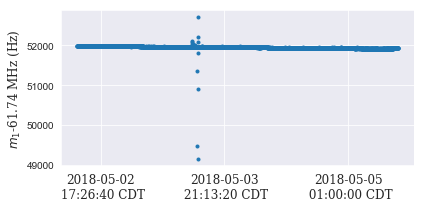

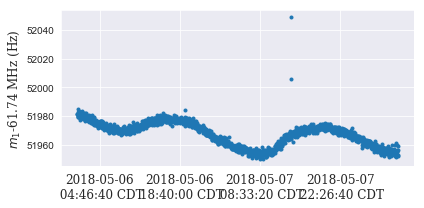

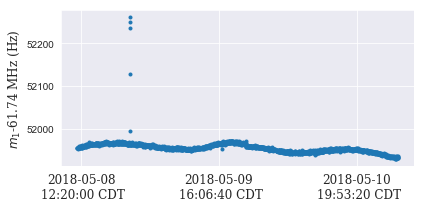

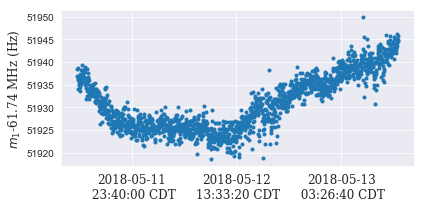

In [12]:
sns.set_style('darkgrid')

#fp1
fig2, ax2 = plt.subplots(1,1)
m = 1
ax2.plot(print_df_1.index.values, print_df_1['m'+str(m)], '.')
ax2.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax2)
fig2.set_size_inches(6,3)
fig2.tight_layout()

#fp2
fig3, ax3 = plt.subplots(1,1)
m = 1
ax3.plot(print_df_2.index.values, print_df_2['m'+str(m)], '.')
ax3.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax3)
fig3.set_size_inches(6,3)
fig3.tight_layout()

#fp3
fig4, ax4 = plt.subplots(1,1)
m = 1
ax4.plot(print_df_3.index.values, print_df_3['m'+str(m)], '.')
ax4.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax4)
fig4.set_size_inches(6,3)
fig4.tight_layout()

#fp4
fig5, ax5 = plt.subplots(1,1)
m = 1
ax5.plot(print_df_4.index.values, print_df_4['m'+str(m)], '.')
ax5.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax5)
fig5.set_size_inches(6,3)
fig5.tight_layout()

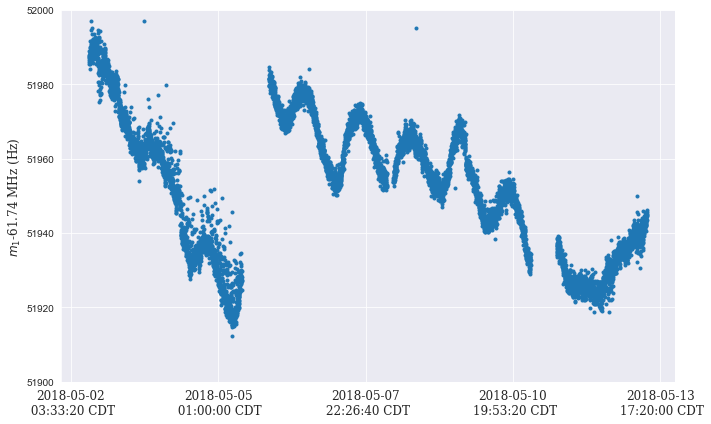

In [13]:
#All
fig6, ax6 = plt.subplots(1,1)
m = 1
Nine_days = [print_df_1, print_df_2, print_df_3, print_df_4]
print_df_9d = pd.concat(Nine_days)
ax6.plot(print_df_9d.index.values, print_df_9d['m'+str(m)], '.')
ax6.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax6)
plt.ylim(51900,52000)
fig6.set_size_inches(10,6)
fig6.tight_layout()